# Machine Learning PROJECT

## Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading a dataset:

In [2]:
df= pd.read_csv("telecom_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Understanding the statistics of data:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
df['TotalCharges'].isnull().sum()

0

In [7]:
#Looking at Total Charges column, we can simply say that it should be a datatype of float64 yet in the info it is 
#showing as object datatype. Hence we checked the value_counts of that column where there are 11 fields such that it contains 
#a space. These spaces would not be considered under null values 
#hence we need to convert/replace these blank spaces with np.nan values so that it can be easy to handle those values.
#This is the reason that the "TotalCharges" column was considered as object type by the system.

## Replacing & Handling Null Values:

In [8]:
df['TotalCharges'].replace(' ',np.nan,inplace=True)

In [9]:
df['TotalCharges'].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [10]:
df['TotalCharges'].isnull().sum()

11

In [11]:
#I have replaced those blank spaces with np.nan and now we may clearly see it shows 11 null values. 
#Since the no.of null values are less this can be handled by replacing them with Central Tendencies.

In [12]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df['TotalCharges'].value_counts()

1397.475    11
20.200      11
19.750       9
20.050       8
19.900       8
            ..
6849.400     1
692.350      1
130.150      1
3211.900     1
6844.500     1
Name: TotalCharges, Length: 6531, dtype: int64

## Checking Outliers: 

In [17]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

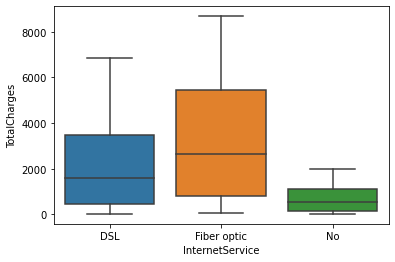

In [18]:
sns.boxplot(data=df,x="InternetService",y="TotalCharges")
plt.show()

In [19]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

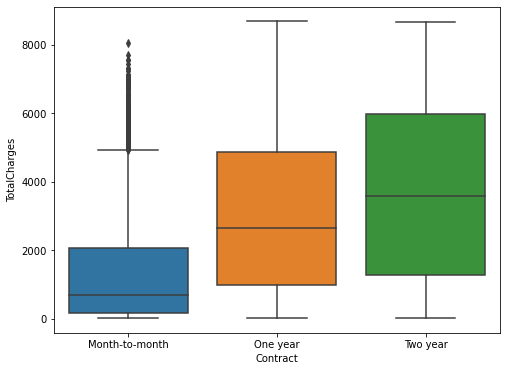

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Contract",y="TotalCharges")
plt.show()

In [21]:
#I found a outlier in the Contract basis where Month-to-month contracts have 1 such customer paying higher charges than usual.
#So I will just drop that outlier from the dataset as below.

## Handling Outliers:

In [22]:
df_a= df.loc[(df['Contract']=='Month-to-month') & (df['TotalCharges']>8000)]
df_a

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3820,9481-IEBZY,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),112.9,8061.5,No


In [23]:
n= df_a.index.values.tolist()
n

[3820]

In [24]:
df.drop(index=n,inplace=True)

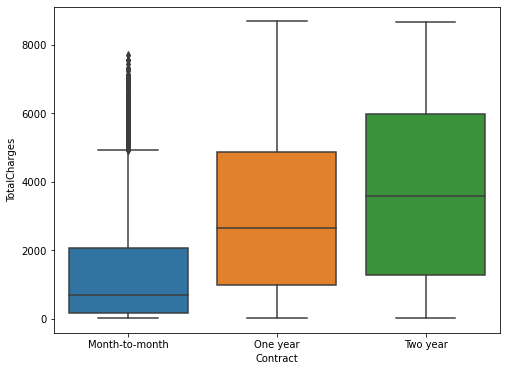

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Contract",y="TotalCharges")
plt.show()

In [26]:
#Now there are no major outliers.

##  Visualizing Internet Service in Demand:

In [27]:
df['InternetService'].value_counts()

Fiber optic    3095
DSL            2421
No             1526
Name: InternetService, dtype: int64

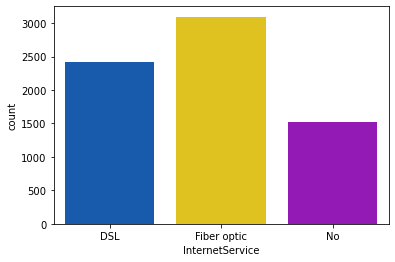

In [28]:
#plt.figure(figsize=(10,10))
sns.countplot(data=df,x='InternetService',palette='prism')
plt.show()

In [29]:
#Referring to above graph, the most preferred or in-use Internet Service is Fiber optic opted by 3096 customers and followed by 
#DSL network opted by 2421 customers.

#  Visualizing most Preferred Payment Method:

In [30]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

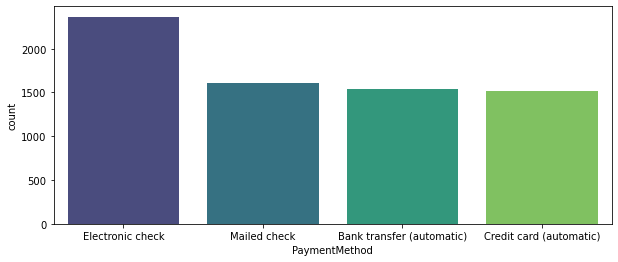

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='PaymentMethod',palette='viridis')
plt.show()

In [32]:
#The graph showcased above, states that the highest number of transactions(i.e.2365) are made through Electronic checks.
#Rest of the transactions are likely to be segregated amongst the other 3 modes of payment.
#i.e. Mailed check for 1612 transactions,Bank transfer (automatic) for 1544 transactions & Credit card (automatic) for 1521 trans.

## Gender Segregation amongst Consumers:

In [33]:
df['gender'].value_counts()

Male      3554
Female    3488
Name: gender, dtype: int64

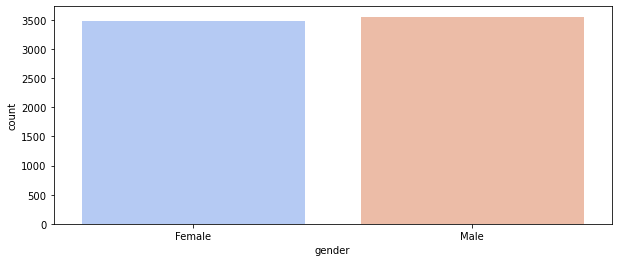

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='gender',palette='coolwarm')
plt.show()

In [35]:
#This graph pretty much tells us that the consumers are equally diversed per their gender.

---

## Dropping customerID column as it contributes the least in our analysis:

In [36]:
df.drop('customerID',axis=1,inplace=True)

## Separating Numeric & Categoric Data Columns:

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   object 
 1   SeniorCitizen     7042 non-null   int64  
 2   Partner           7042 non-null   object 
 3   Dependents        7042 non-null   object 
 4   tenure            7042 non-null   int64  
 5   PhoneService      7042 non-null   object 
 6   MultipleLines     7042 non-null   object 
 7   InternetService   7042 non-null   object 
 8   OnlineSecurity    7042 non-null   object 
 9   OnlineBackup      7042 non-null   object 
 10  DeviceProtection  7042 non-null   object 
 11  TechSupport       7042 non-null   object 
 12  StreamingTV       7042 non-null   object 
 13  StreamingMovies   7042 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7042 non-null   object 
 16  PaymentMethod     7042 non-null   object 


In [38]:
df_num= df.select_dtypes(['float64','int64'])
#df_num

In [39]:
df_cat= df.select_dtypes(['object'])
#df_cat

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
for i in df_cat:
    le= LabelEncoder()
    df_cat[i]= le.fit_transform(df_cat[i])

In [42]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


## Visualizing the relationship between features & target column: 

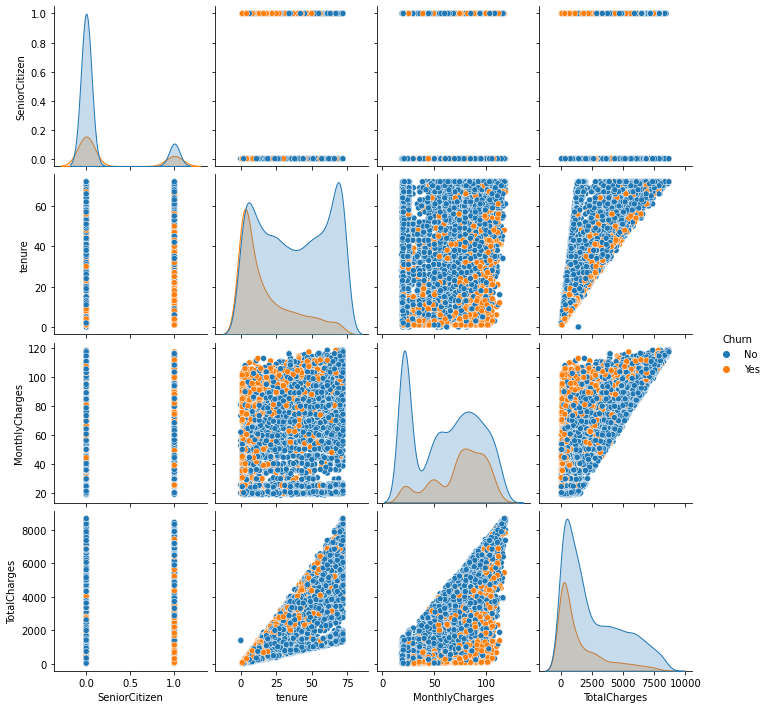

In [43]:
sns.pairplot(data=df,vars=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'],hue='Churn')

In [44]:
df.corrwith(other=df_cat['Churn'],axis=0)

SeniorCitizen     0.151143
tenure           -0.352165
MonthlyCharges    0.193533
TotalCharges     -0.198916
dtype: float64

In [45]:
#Here we can observe that MonthlyCharges is directly proportional to Churn. 
#Also, Senior Citizen column has a positive correlation with Churn.
#While Tenure is inversely proportional to Churn.

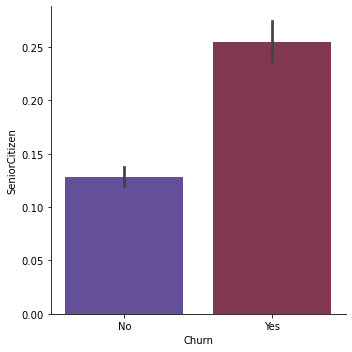

In [46]:
sns.catplot(data=df,x= 'Churn',y='SeniorCitizen',palette='twilight',kind='bar')
plt.show()

In [47]:
#Assuming that 0's belong to Old age group and 1's belong to Young age group, we may observe in the above graph that 
#younger consumers are more likely to churn as compared to old age consumers.

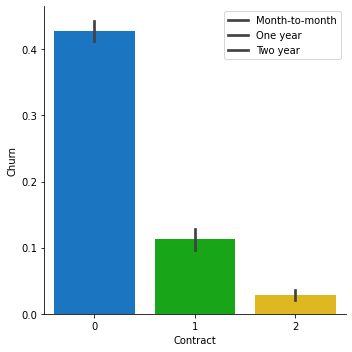

In [48]:
sns.catplot(data=df_cat,y= 'Churn',x='Contract',palette='nipy_spectral',kind='bar')
plt.legend(df['Contract'].unique())
plt.show()

In [49]:
#Here we may conclude that consumers opting for Month-to-month contract are more likely to churn i.e. to stop the service.
#Thus,it is implied that the 2 year contracts are contributing towards consumer retention.

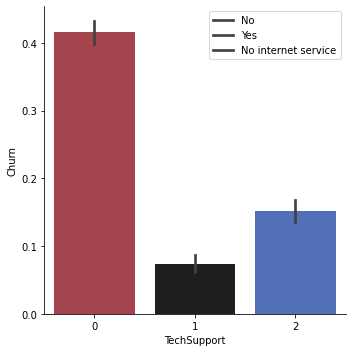

In [50]:
sns.catplot(data=df_cat,y= 'Churn',x='TechSupport',palette='icefire_r',kind='bar')
plt.legend(df['TechSupport'].unique())
plt.show()

In [51]:
#Looking at above graph we may conclude that consumers are more likely to churn if no Tech Support is provided to them.
#Thus,it is implied that providing TechSupport contributes towards consumer retention.

## Concatenating numeric & categoric data into new Dataframe:

In [52]:
df1= pd.concat([df_num,df_cat],axis=1)
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,72,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,4,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


## Checking Distribution: 

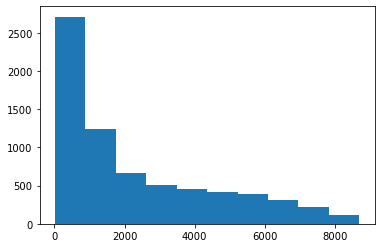

In [73]:
plt.hist(x='TotalCharges',data=df)
plt.show()

In [ ]:
#From the above graph, we can conclude that TotalCharges is right skewed.

## Feature Scaling:

In [53]:
from sklearn.preprocessing import MinMaxScaler
ms= MinMaxScaler()
df1[['MonthlyCharges', 'TotalCharges']]= ms.fit_transform(df1[['MonthlyCharges', 'TotalCharges']])

## Separating x & y:

In [54]:
x= df1.iloc[:,:-1]
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,0.385075,0.215867,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,0.354229,0.010310,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,0.239303,0.210241,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,0.521891,0.015330,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,0.662189,0.227521,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,72,0.845274,0.847461,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,11,0.112935,0.037809,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,4,0.558706,0.033210,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [55]:
y= df1.iloc[:,-1]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7042, dtype: int32

## Splitting data for Training & Testing:

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25,random_state=1) 

## Model Building:

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [58]:
lr= LogisticRegression()
knn= KNeighborsClassifier()

In [59]:
def build_model(model_obj):
    model_obj.fit(xtrain,ytrain)
    ypred= model_obj.predict(xtest)
    print(classification_report(ytest,ypred))

In [60]:
build_model(lr)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1317
           1       0.64      0.58      0.60       444

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.81      1761



In [61]:
build_model(knn)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1317
           1       0.56      0.52      0.54       444

    accuracy                           0.78      1761
   macro avg       0.70      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



In [62]:
#Since KNN doesnot work well on large datasets it is giving us a comparatively lower accurracy than Logistic Regression. 
#However we have a binary classification problem here for which Logistic Regression performs well.
#Hence, considering above facts I would be opting for Logistic Regression as my final model.

# Final Model:

In [63]:
build_model(lr)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1317
           1       0.64      0.58      0.60       444

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.81      1761



# Conclusions:

In [65]:
#1. MonthlyCharges is directly proportional to Churn. 
#2. Younger consumers are more likely to churn as compared to old age consumers.
#3. More the Tenure less would be the Churn.
#4. Consumers are likely to stop the services in case of Month-to-month contract.
#5. No tech support service also leads to consumer churn.

# Recommendations:

In [ ]:
#1. Offering Tech support and other such beneficial services in a 2 year contract would contribute towards consumer retension.
#2. Introducing exciting offers to attract young consumers considering their needs might possibly help to avoid churn.
#3. Month-to-month contract should be avoided as Consumers are likely to stop the services in case of Month-to-month contract.